### 회귀분석

#### 부품 수에 따른 수리 소요 시간 데이터
소요시간을 예측하기 위한 회귀분석을 실시하고 결과를 해석하시오.

In [71]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot,add_constant
#선형모델
import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
#jupyter notebook에서 그래프 자동출력 옵션
%matplotlib inline

In [9]:
#한글폰트 적용
mpl.rc("font", family="Malgun Gothic")

In [27]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/부품수리시간.csv', encoding='CP949')
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [4]:
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [10]:
#요약통계량
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


#### 1. 경향성 확인

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


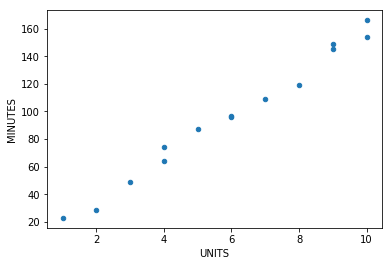

In [11]:
df_raw.plot.scatter(x="UNITS",y="MINUTES")
df_raw.corr(method="pearson").round(3)

#### 2. 회귀모델 생성

In [15]:
reg_model = smf.ols(formula="MINUTES~UNITS", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.92e-13
Time:                        10:09:19   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


#### 3. 오차의 기본가정 검토

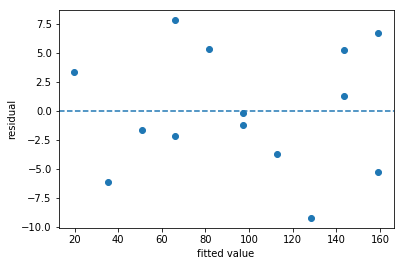

In [21]:
#등분산성 검정

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

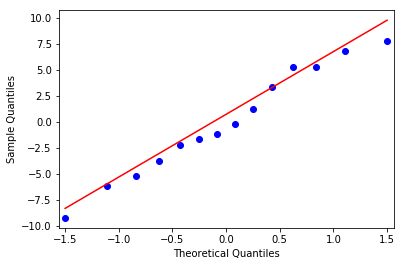

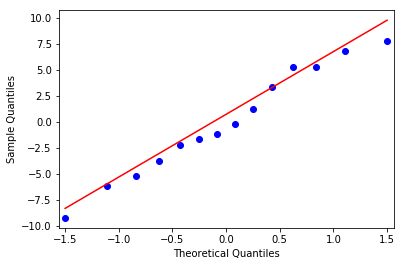

In [22]:
#정규성 검정

qqplot(reg_result.resid, line="q")

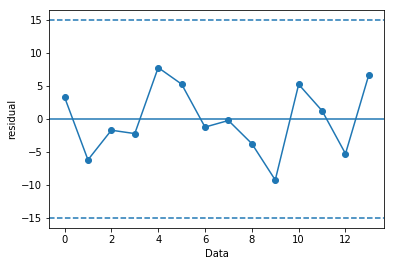

In [25]:
#독립성 검정

plt.plot(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--") #+-3시그마 로 그리기
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

In [26]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#선형회귀모형
from sklearn.linear_model import LinearRegression

#변수선택법(후진제거법)
from sklearn.feature_selection import RFE

#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [29]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/체질검사.csv',encoding='CP949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


#### 1. 변수 간의 경향성 파악

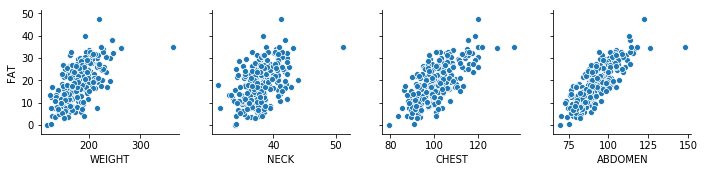

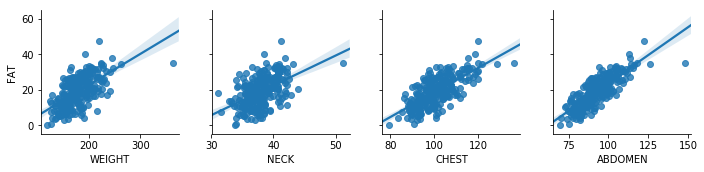

In [30]:
sns.pairplot(df_raw, y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"])
sns.pairplot(df_raw, y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"], kind="reg")

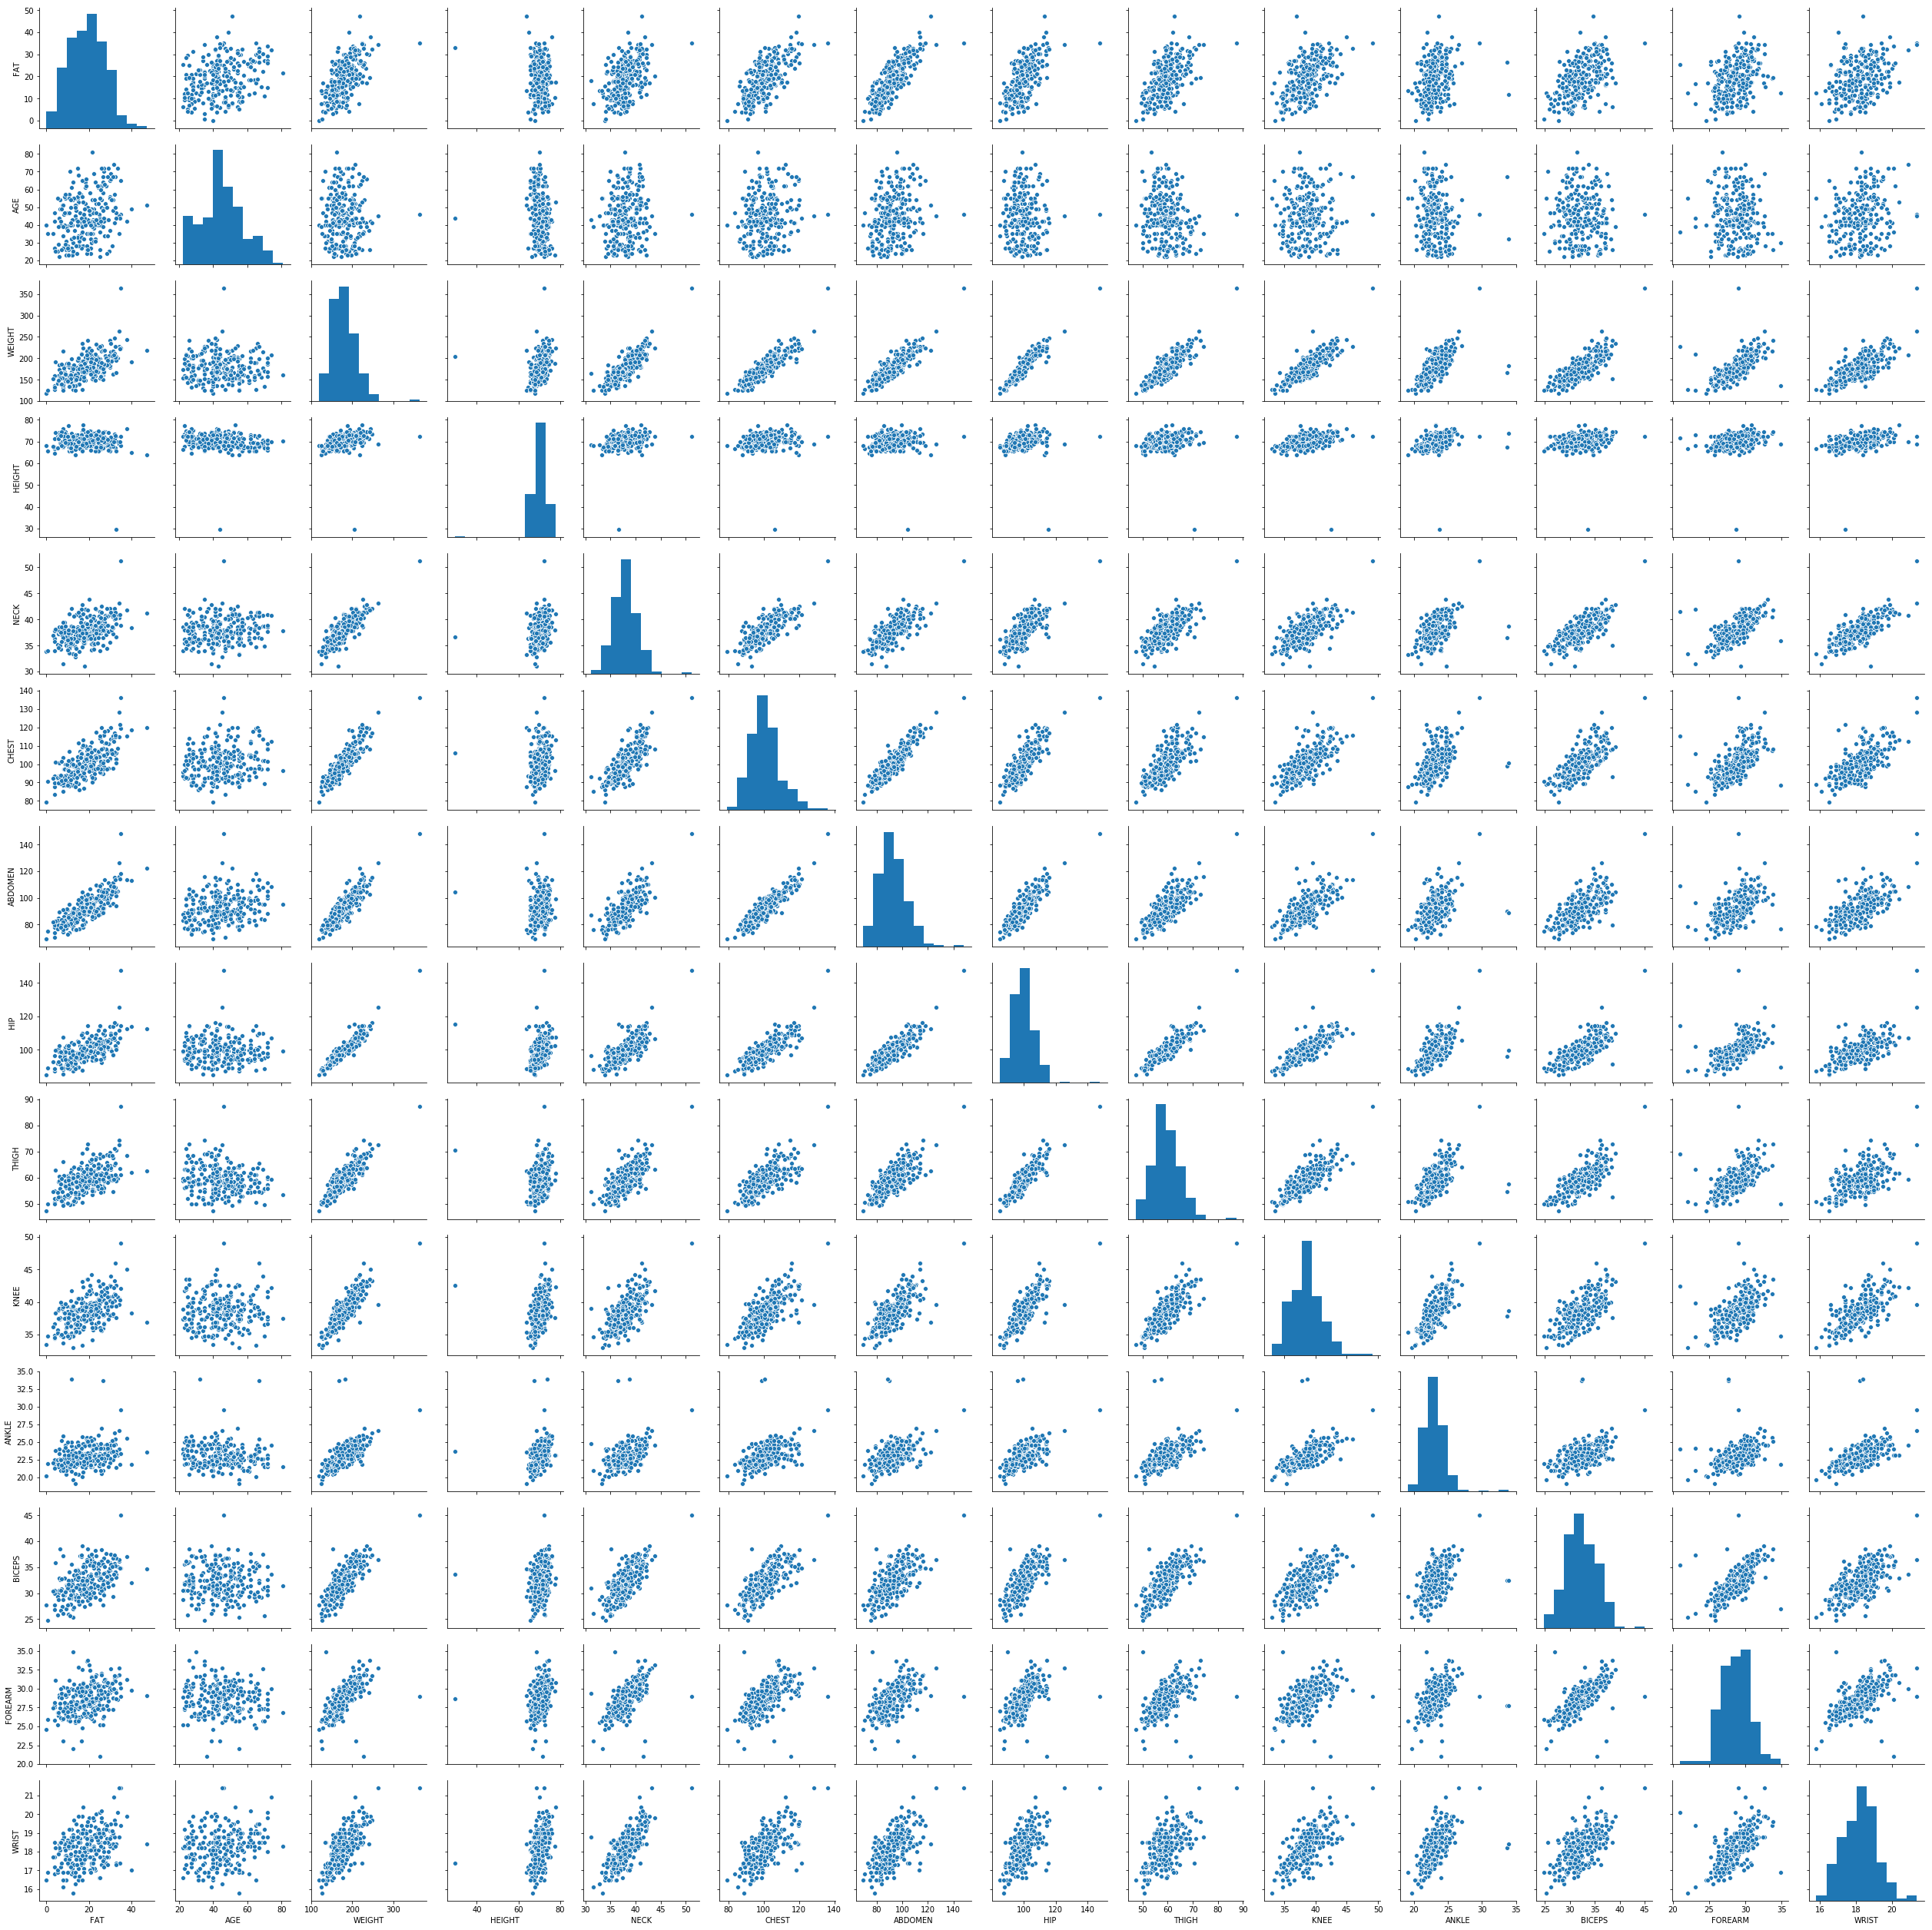

In [31]:
sns.pairplot(df_raw)

In [32]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


#### 2. 회귀 모델 생성 : 설명변수 전체

In [34]:
reg_model = smf.ols(formula = 'FAT ~ AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+\
                               KNEE+ANKLE+BICEPS+FOREARM+WRIST',data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.72e-64
Time:                        10:42:31   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [37]:
#설명변수 간의 다중공선성 확인

df_raw_x = df_raw.drop('FAT', axis=1)

df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [40]:
#설명변수 다중공선성 처리

reg_model = smf.ols(formula = 'FAT ~ AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+\
                               KNEE+ANKLE+BICEPS+FOREARM+WRIST',data = df_raw) #WEIGHT 제외
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.75e-64
Time:                        11:12:30   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [42]:
#WEIGHT 제거 후 공선성 재확인

df_raw_x = df_raw.drop(['FAT',"WEIGHT"],axis=1)

df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [44]:
#ABDOMEN 제거 후 공선성 확인

reg_model = smf.ols(formula = 'FAT ~ AGE+HEIGHT+NECK+CHEST+HIP+THIGH+\
                               KNEE+ANKLE+BICEPS+FOREARM+WRIST',data = df_raw) #ABDOMEN 제외
reg_result = reg_model.fit()
print(reg_result.summary())

df_raw_x = df_raw.drop(['FAT','WEIGHT','ABDOMEN'],axis=1)

df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     35.61
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.10e-44
Time:                        11:27:56   Log-Likelihood:                -770.51
No. Observations:                 252   AIC:                             1565.
Df Residuals:                     240   BIC:                             1607.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9228      8.482     -3.292      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
2,HEIGHT,1.329
1,AGE,1.762
8,ANKLE,1.838
10,FOREARM,2.186
11,WRIST,3.258
9,BICEPS,3.481
3,NECK,3.923
7,KNEE,4.311
4,CHEST,4.883
6,THIGH,7.575


In [49]:
#ANKLE 제거 후 공선성 확인 (p-value 값이 크다.)

reg_model = smf.ols(formula = 'FAT ~ AGE+HEIGHT+NECK+CHEST+HIP+THIGH+\
                               KNEE+BICEPS+FOREARM+WRIST',data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

df_raw_x = df_raw.drop(['FAT','WEIGHT','ABDOMEN','ANKLE'],axis=1)

df_raw_x_const = add_constant(df_raw_x)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     39.33
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.28e-45
Time:                        11:40:27   Log-Likelihood:                -770.52
No. Observations:                 252   AIC:                             1563.
Df Residuals:                     241   BIC:                             1602.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9843      8.447     -3.313      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


p-value값이 너무 큰 변수들을 제거하는 동작을 반복한다 !!!

#### 3. 후진제거법을 이용한 변수선택

In [55]:
#변수 다시 재설정(?)
df_raw_x = df_raw.drop('FAT', axis=1)
df_raw_y = df_raw['FAT']

##
df_raw_y = df_raw['FAT']

model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x,df_raw_y)

selected_cols = df_raw_x.columns[rfe.support_]

removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [56]:
rfe_reg_model = smf.ols(formula = 'FAT~ NECK+ABDOMEN+HIP+FOREARM+WRIST', data=df_raw)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        11:47:44   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [58]:
#후진제거법을 이용한 변수선택 - 다중공선성 재진단

df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_rfe_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]

df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


#### 4. 잔차분석

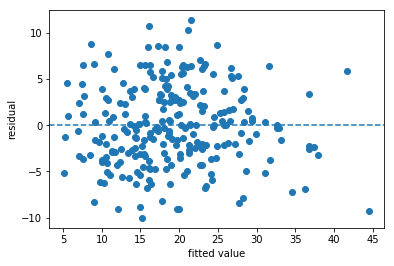

In [62]:
#등분산성 검정

plt.scatter(rfe_reg_result.fittedvalues, rfe_reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

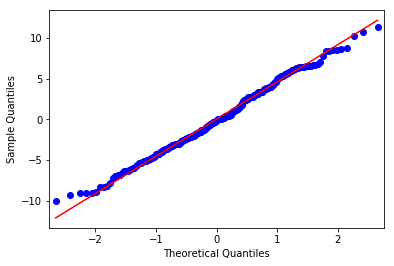

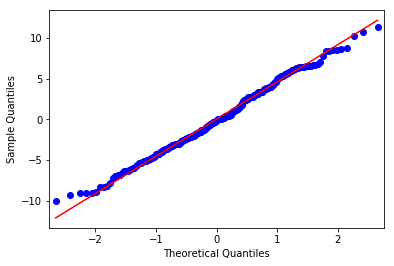

In [63]:
#정규성 검정

qqplot(rfe_reg_result.resid, line="q")

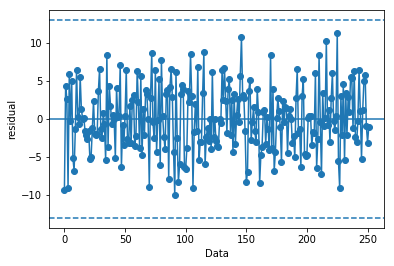

In [64]:
#독립성 검정

plt.plot(df_raw.index, rfe_reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(rfe_reg_result.resid), linestyle="--") #+-3시그마 로 그리기
plt.axhline(y=-3*np.std(rfe_reg_result.resid), linestyle="--")

#### 5. 회귀계수 그래프 (비표준화 회귀계수 기준)

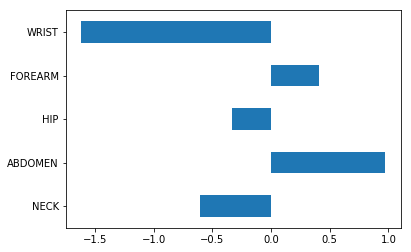

In [65]:
df_reg_coef = pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=False)

#### (표준화 회귀계수 기준)

In [67]:
scaler = StandardScaler()
cols = df_raw_x.columns

np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled['FAT'] = df_raw['FAT']
reg_model_scaled = smf.ols(formula='FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST', data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        13:20:48   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 당뇨병 발병 원인과 관련된 데이터
당뇨병 발생을 예측하기 위해 회귀분석을 실시하고 결과를 해석하시오.

#### 1. 데이터 구성하기

In [77]:
dff = pd.read_csv('/home/pirl/Downloads/data2_py/DIABETES.csv', encoding='CP949')
dff.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [79]:
#결측치 확인
dff.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

모든 예측변수에 대해 결측치가 존재하지 않는다.

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,152.133484,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,77.093005,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,25.000000,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,87.000000,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,140.500000,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,211.500000,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,346.000000,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


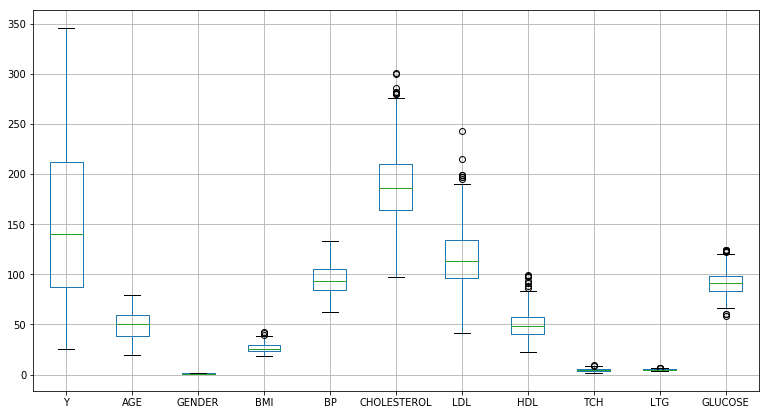

In [83]:
#이상치 확인
dff.boxplot(figsize=(13,7))
dff.describe()

In [139]:
# 이상치 제거
for i in range(1, 11, 1) :
   num1, num2 = np.percentile(df_diabetes.iloc[:,[i]], [25, 75])    iqr_max = num2 + 1.5 * (num2- num1)
   iqr_min = num1 - 1.5 * (num2- num1)    for j in range(0, len(df_diabetes.iloc[:,[i]])) :
       if (df_diabetes.iloc[j,i] > iqr_max):
           df_diabetes.iloc[j,i] = iqr_max
       elif (df_diabetes.iloc[j,i] < iqr_min) :
           df_diabetes.iloc[j,i] = iqr_mindf_diabetes.boxplot(figsize=(15,10))

SyntaxError: invalid syntax (<ipython-input-139-ccc9af67476d>, line 3)

** 이상치 다시 생각하기 IQR
상자그림 LDL,, 

#### 2. 변수간의 경향성 파악  (상관분석)

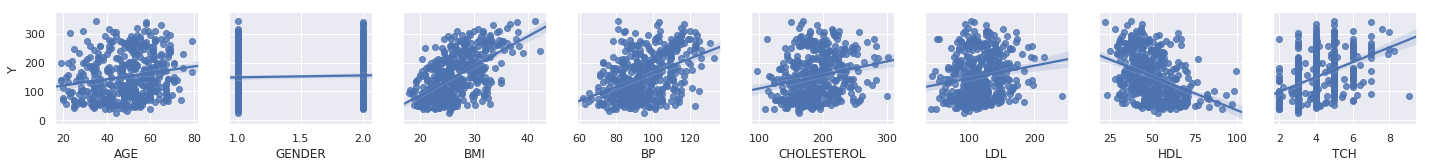

In [92]:
sns.pairplot(dff, y_vars='Y',
             x_vars=['AGE','GENDER','BMI','BP','CHOLESTEROL','LDL','HDL','TCH'],
             kind='reg') #적합선 추가

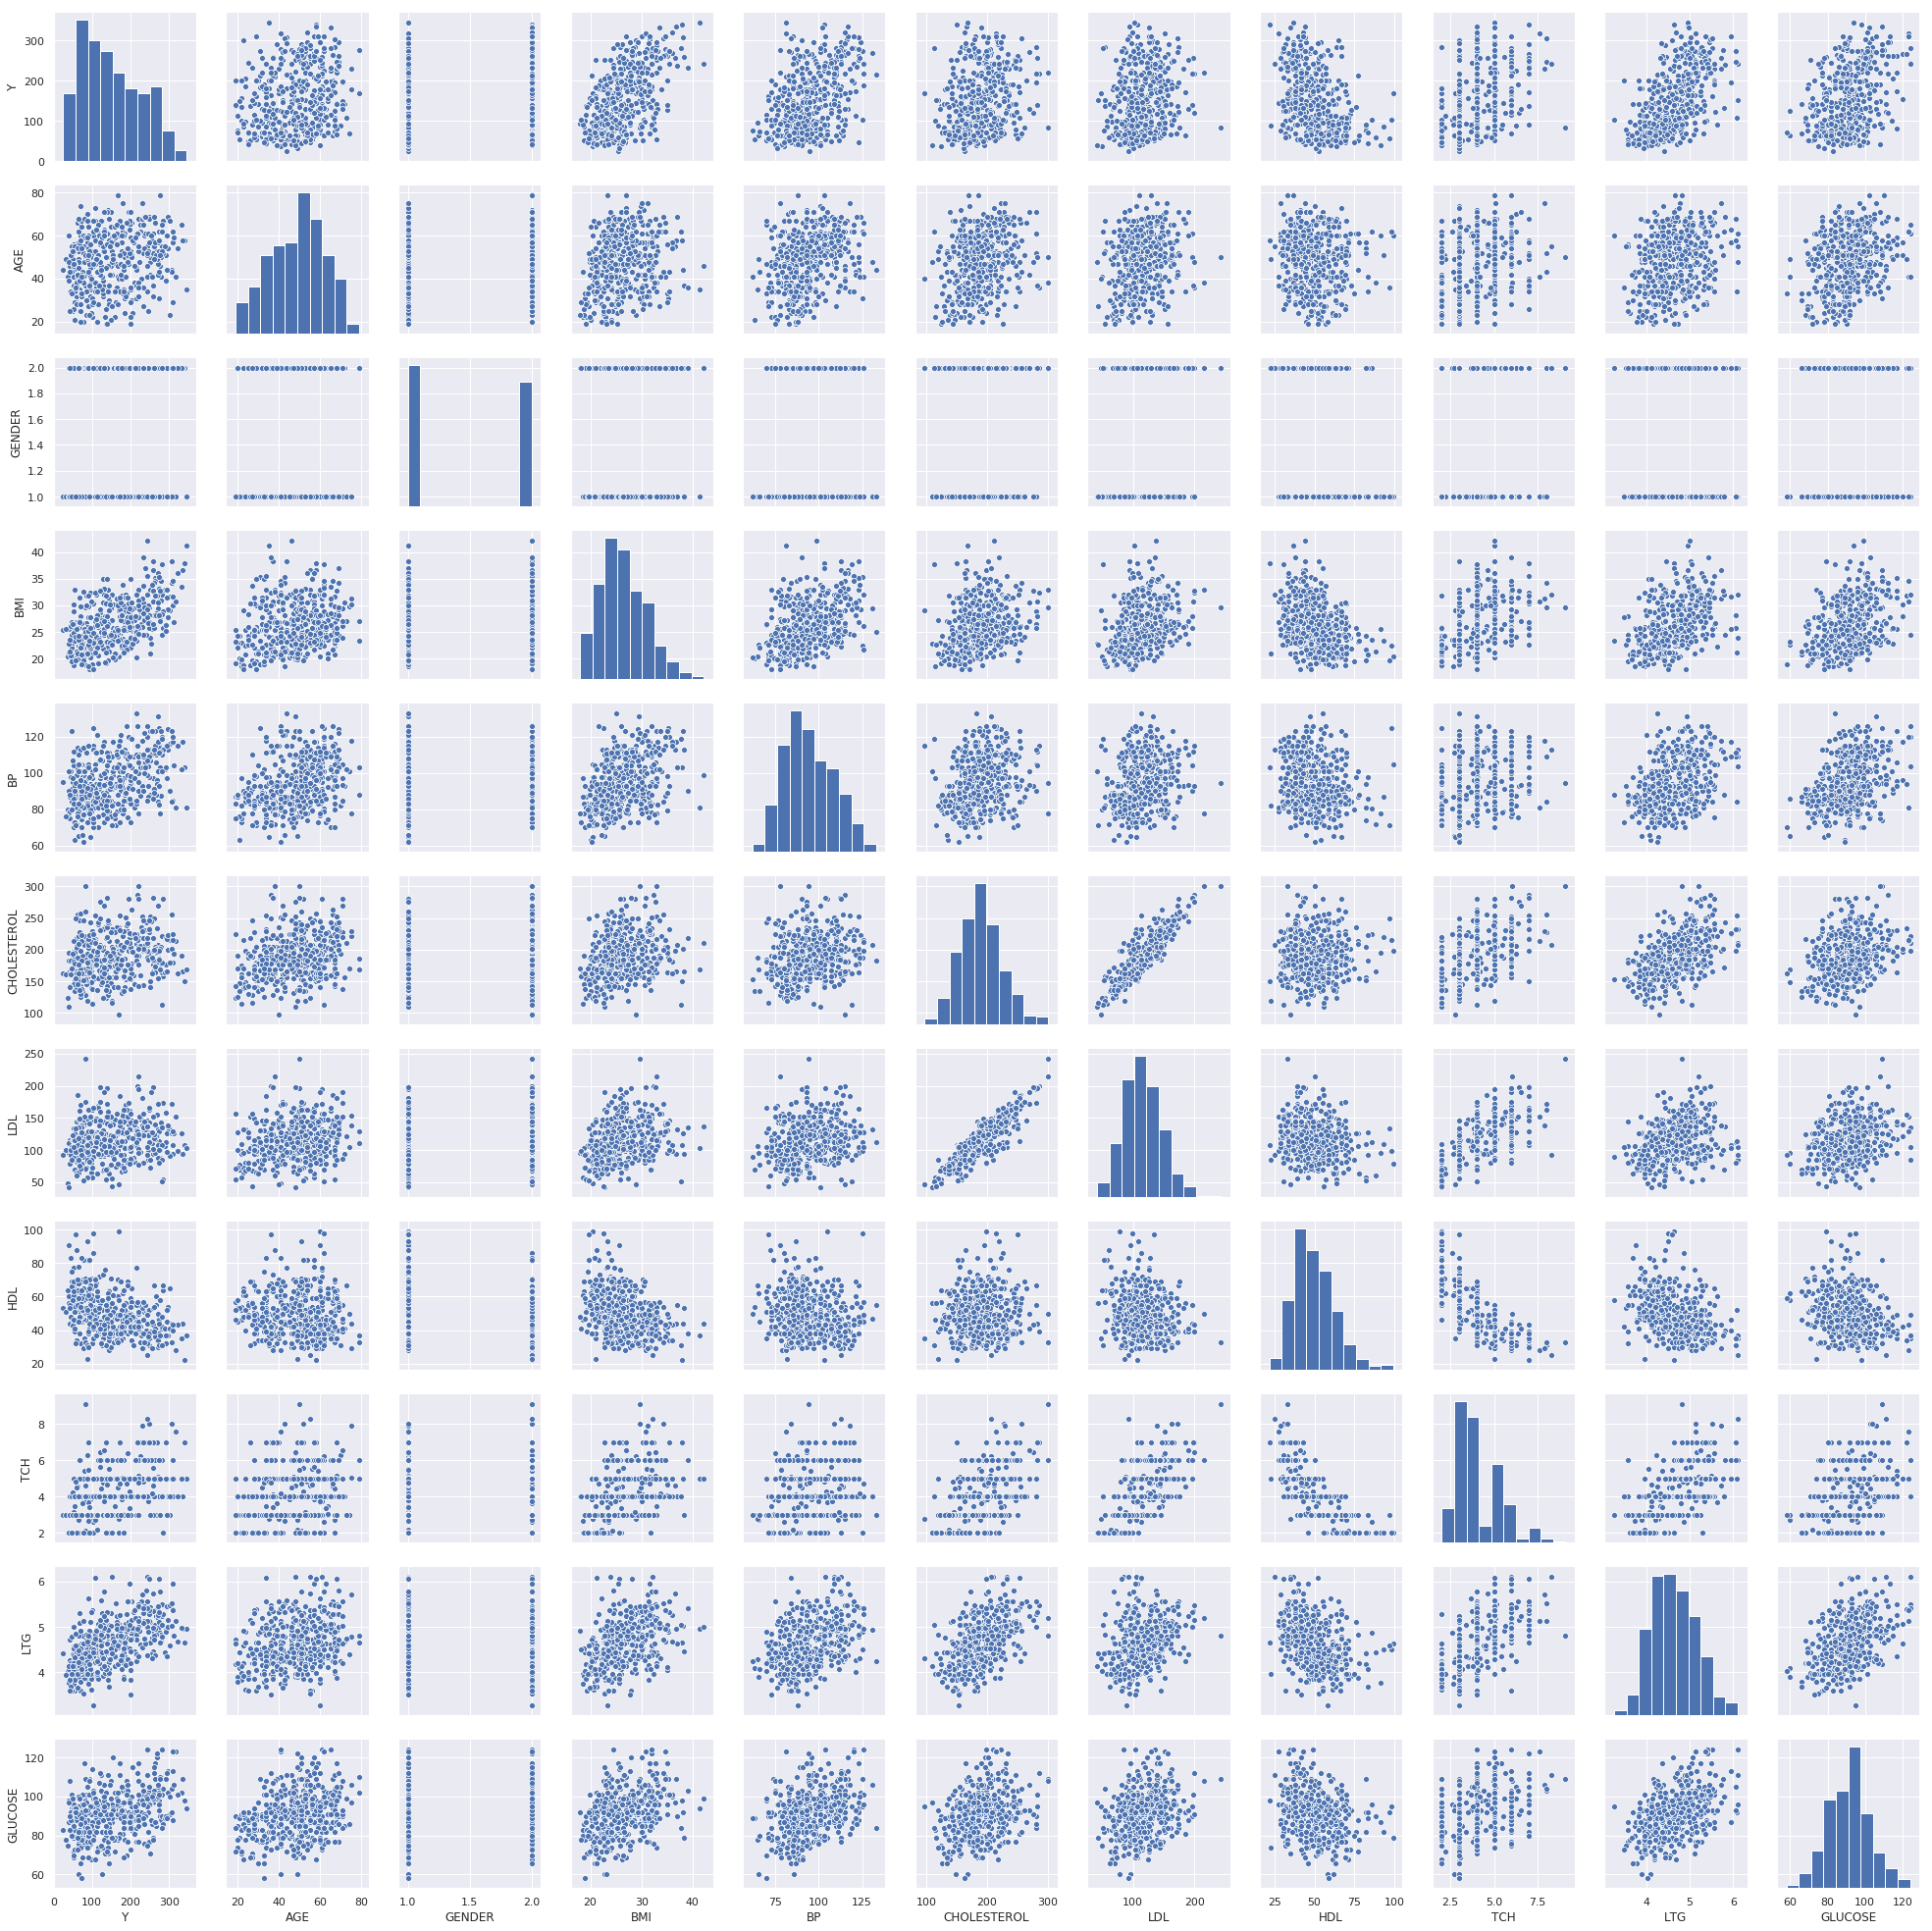

In [93]:
sns.pairplot(dff)# z-score 기준 +- 3을 벗어나는 값을 제거하는 예시
def remove_outlier_std(df):
    for i in range(0, len(df.iloc[1])):
        df.iloc[:,i] = df.iloc[:,i].replace(0, np.NaN)
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    return df.fillna(0)

In [94]:
dff.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


#### 3. 다중공선성 확인

In [99]:
dff_x = dff.drop('Y', axis=1)
dff_x_const = add_constant(dff_x)

dff_vif = pd.DataFrame()
dff_vif['variable']=dff_x_const.columns
dff_vif['VIF']=[variance_inflation_factor(dff_x_const.values,i)\
                for i in range(dff_x_const.shape[1])]

dff_vif.sort_values('VIF',inplace=True)
dff_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


VIF가 가장 큰 CHOLESTEROL 변수를 제거한다.

In [101]:
dff_x = dff.drop(['Y','CHOLESTEROL'], axis=1)
dff_x_const = add_constant(dff_x)

dff_vif = pd.DataFrame()
dff_vif['variable']=dff_x_const.columns
dff_vif['VIF']=[variance_inflation_factor(dff_x_const.values,i)\
                for i in range(dff_x_const.shape[1])]

dff_vif.sort_values('VIF',inplace=True)
dff_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.217
2,GENDER,1.275
4,BP,1.457
9,GLUCOSE,1.484
3,BMI,1.502
8,LTG,2.173
5,LDL,2.927
6,HDL,3.737
7,TCH,7.819
0,const,216.005


그러면 VIF가 모두 10보다 작은 수를 갖게 된다.
이제, CHOLESTEROL을 제외한 나머지 변수들에 대해 회귀모델을 생성해 보자!

#### 4. 회귀모델 생성

In [102]:
reg = smf.ols(formula = 'Y~AGE+GENDER+BMI+BP+LDL+HDL+TCH+LTG+GLUCOSE',
              data=dff)
reg_result = reg.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     50.71
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.06e-62
Time:                        14:31:41   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     432   BIC:                             4837.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.4263     37.972     -6.016      0.0

* 분석 자료의 수는 442개, 잔차 자유도는 432, 모델 자유도는 0 이다.
* 분산분석(ANOVA)의 결과 p-value 가 0.05보다 작으므로 회귀모델로서 유의하다.
* 설명력 (다중회귀분석이므로 수정된 결정계수를 본다!) 은 0.504로 설명력이 낮다고 할 수 있다.
* 그리고 각 변수별로 t통계량의 p-value 를 봤을 때, 0.05보다 큰 값 중 가장 큰 AGE를 먼저 제거하려한다.

In [103]:
reg = smf.ols(formula = 'Y~GENDER+BMI+BP+LDL+HDL+TCH+LTG+GLUCOSE',
              data=dff)
reg_result = reg.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     57.17
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.94e-63
Time:                        14:32:54   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     433   BIC:                             4831.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.0757     37.836     -6.028      0.0

그 다음, TCH를 제거하려 한다.

In [106]:
reg = smf.ols(formula = 'Y~GENDER+BMI+BP+LDL+HDL+LTG+GLUCOSE',
              data=dff)
reg_result = reg.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     65.42
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           5.22e-64
Time:                        14:33:57   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     434   BIC:                             4825.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -224.0039     36.787     -6.089      0.0

그 다음, GLUCOSE를 제거하려 한다.

In [107]:
reg = smf.ols(formula = 'Y~GENDER+BMI+BP+LDL+HDL+LTG',
              data=dff)
reg_result = reg.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     76.11
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.01e-64
Time:                        14:34:31   Log-Likelihood:                -2388.5
No. Observations:                 442   AIC:                             4791.
Df Residuals:                     435   BIC:                             4820.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -214.5436     35.721     -6.006      0.0

그 다음, LDL을 제거하려 한다.

In [110]:
reg = smf.ols(formula = 'Y~GENDER+BMI+BP+HDL+LTG',
              data=dff)
reg_result = reg.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     90.26
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.75e-65
Time:                        14:35:00   Log-Likelihood:                -2390.1
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     436   BIC:                             4817.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -217.6849     35.764     -6.087      0.0

#### 5. 잔차분석

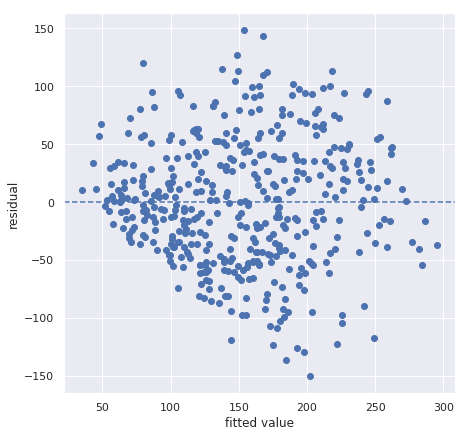

In [116]:
#등분산성 검정
plt.figure(figsize=(7, 7))

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

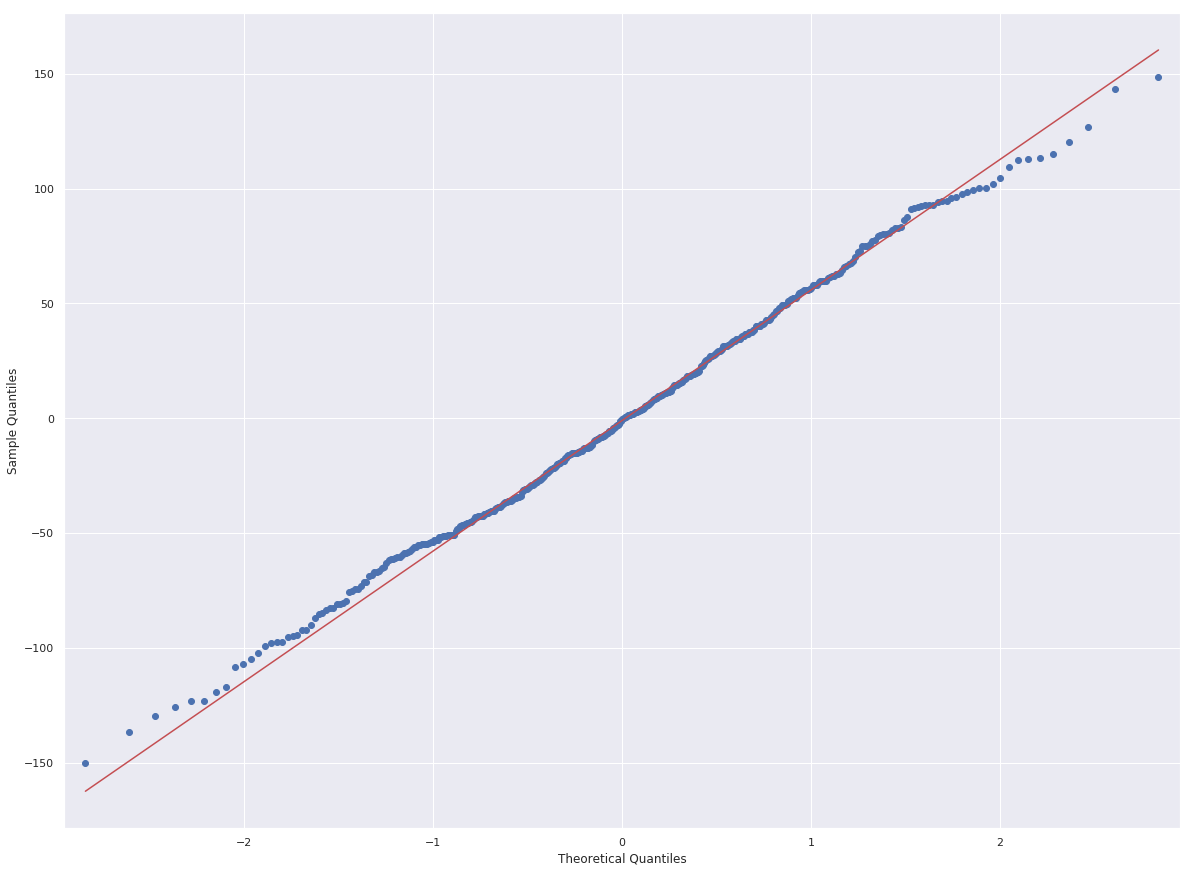

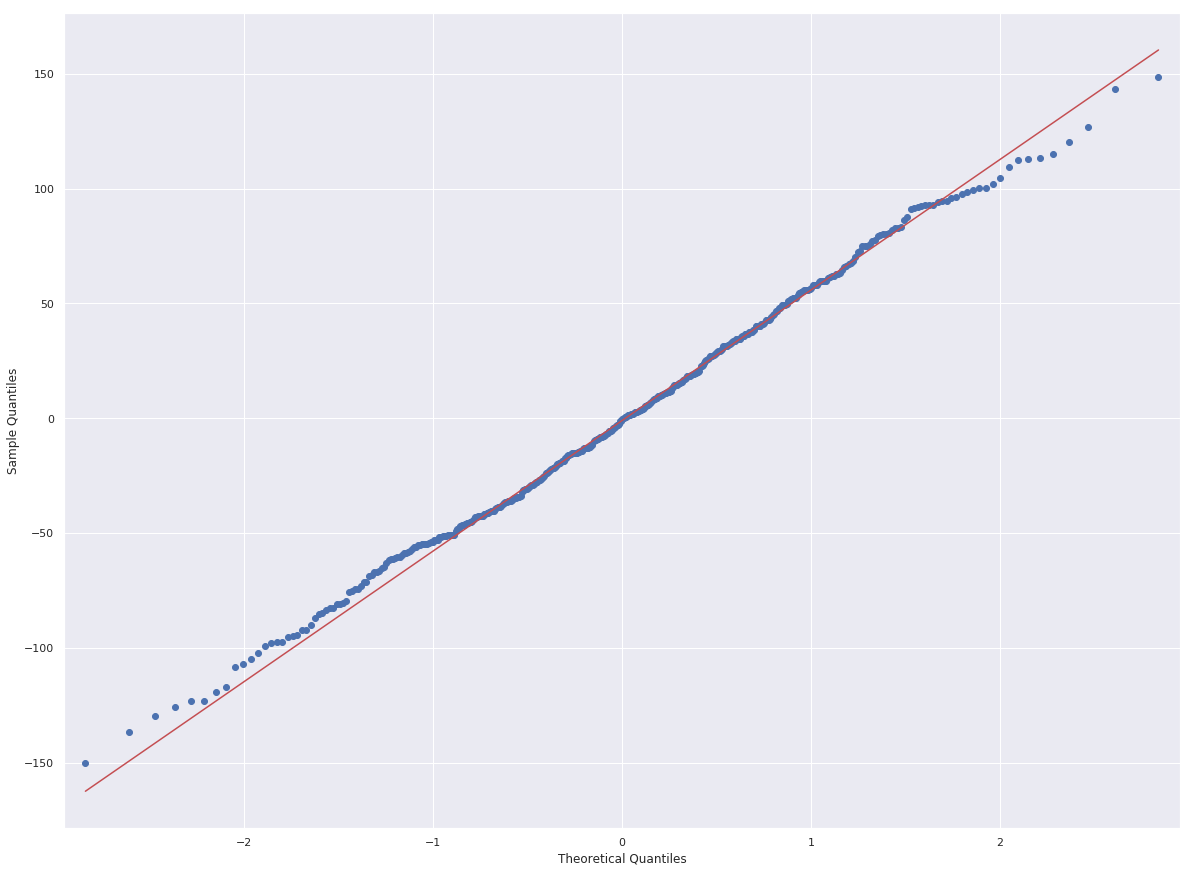

In [122]:
#정규성 검정

qqplot(reg_result.resid, line="q")

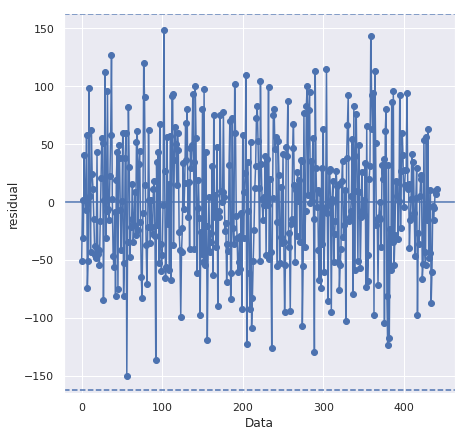

In [123]:
#독립성 검정
plt.figure(figsize=(7, 7))
plt.plot(dff.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--") #+-3시그마 로 그리기
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

### 이상치 !! 설명력을 높이기 위해 이상치 조정필요

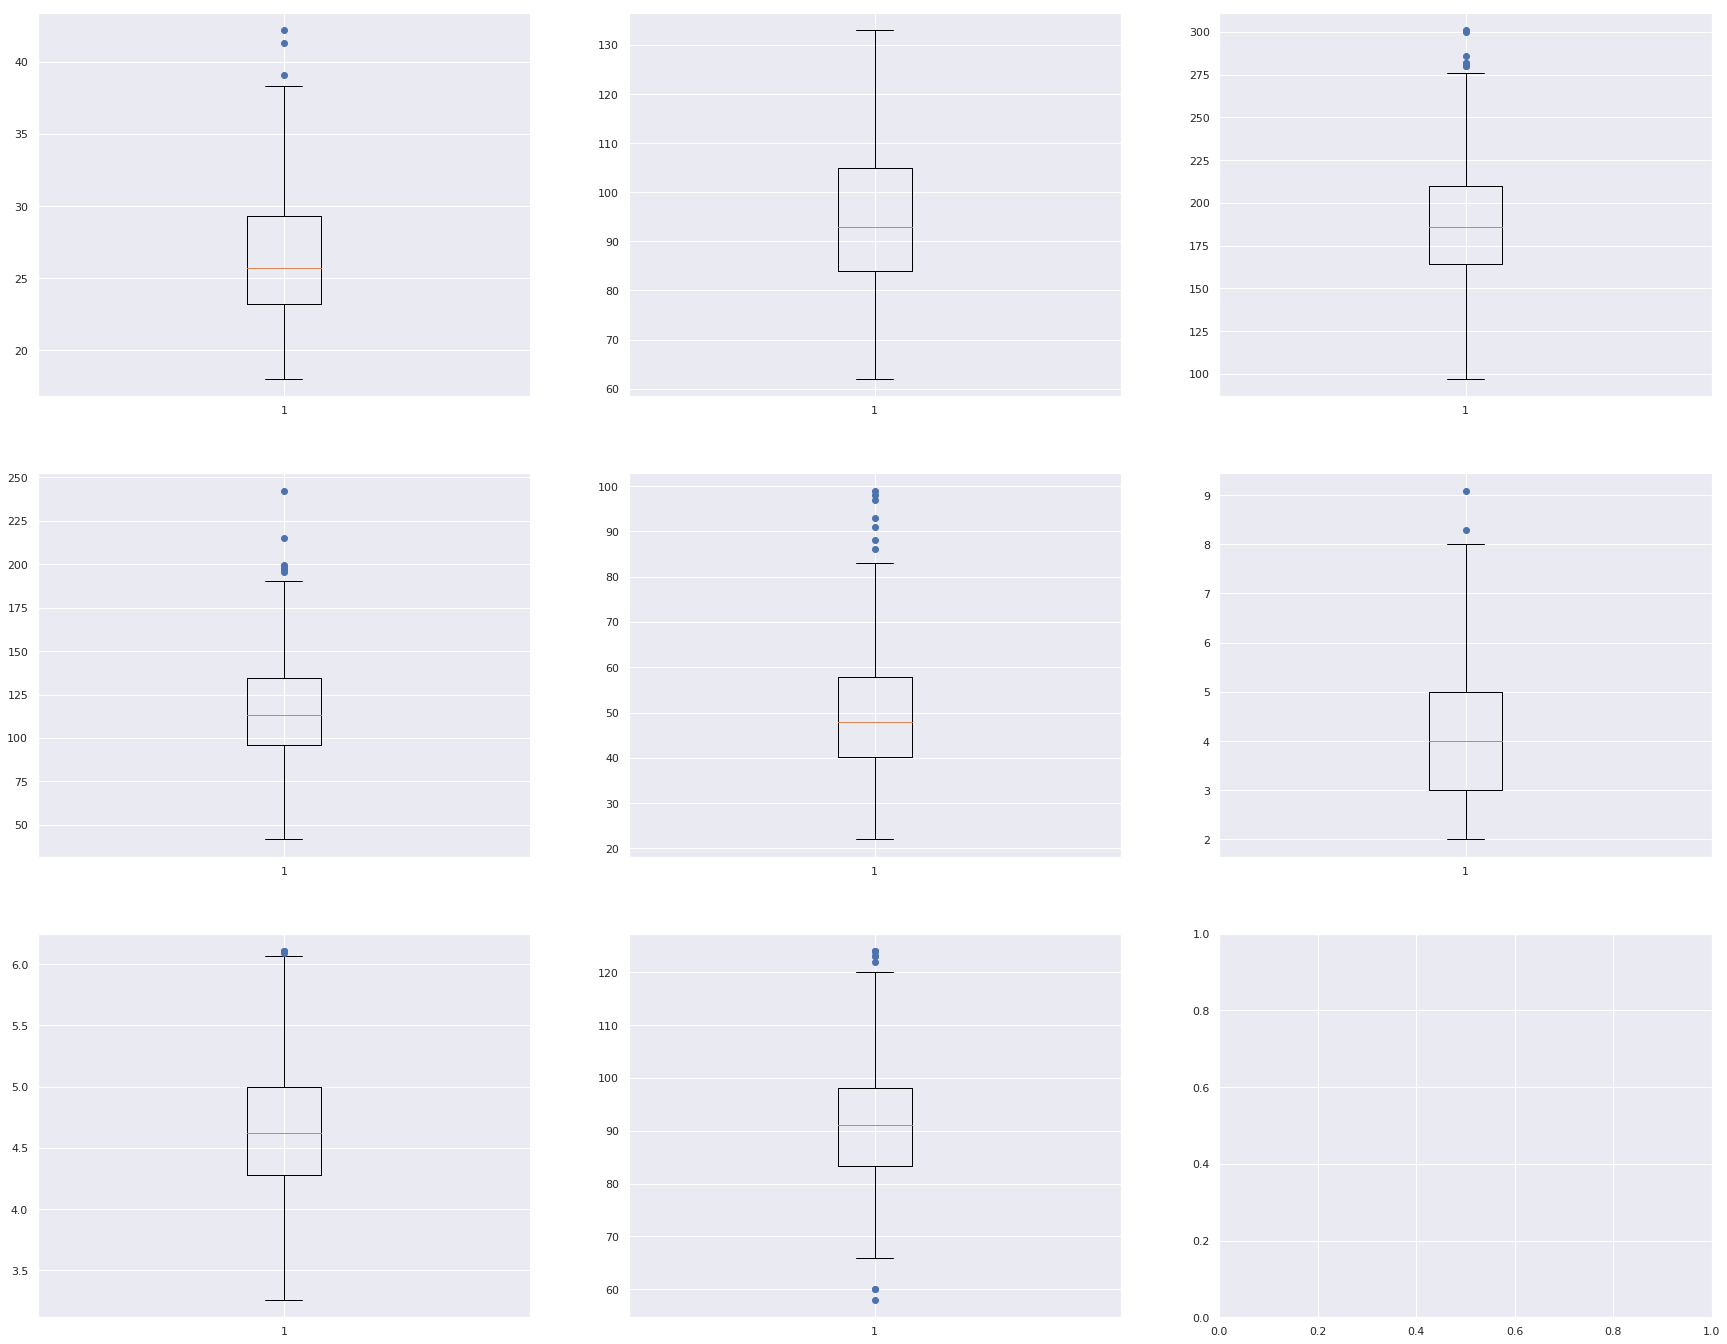

In [124]:
f, ax = plt.subplots(3, 3, figsize=(30, 24))
ax[0, 0].boxplot(dff['BMI'], sym="bo")
ax[0, 1].boxplot(dff['BP'], sym="bo")
ax[0, 2].boxplot(dff['CHOLESTEROL'], sym="bo")
ax[1, 0].boxplot(dff['LDL'], sym="bo")
ax[1, 1].boxplot(dff['HDL'], sym="bo")
ax[1, 2].boxplot(dff['TCH'], sym="bo")
ax[2, 0].boxplot(dff['LTG'], sym="bo")
ax[2, 1].boxplot(dff['GLUCOSE'], sym="bo")
plt.show()

In [125]:
df_BMI_out = 1.5 * dff.describe().round(3)['BMI']['std'] + dff.describe().round(3)['BMI']['75%']
df_CHOLESTEROL_out = 1.5 * dff.describe().round(3)['CHOLESTEROL']['std'] + dff.describe().round(3)['CHOLESTEROL']['75%']
df_LDL_out = 1.5 * dff.describe().round(3)['LDL']['std'] + dff.describe().round(3)['LDL']['75%']
df_HDL_out = 1.5 * dff.describe().round(3)['HDL']['std'] + dff.describe().round(3)['HDL']['75%']
df_TCH_out = 1.5 * dff.describe().round(3)['TCH']['std'] + dff.describe().round(3)['TCH']['75%']
df_LTG_out = 1.5 * dff.describe().round(3)['LTG']['std'] + dff.describe().round(3)['LTG']['75%']

In [126]:
dff[dff['BMI'] > df_BMI_out] = df_BMI_out
dff[dff['CHOLESTEROL'] > df_CHOLESTEROL_out] = df_CHOLESTEROL_out
dff[dff['LDL'] > df_LDL_out] = df_LDL_out
dff[dff['HDL'] > df_HDL_out] = df_HDL_out
dff[dff['TCH'] > df_TCH_out] = df_TCH_out
dff[dff['LTG'] > df_LTG_out] = df_LTG_out


In [127]:
#그 다음, 회귀모델 추정

reg = smf.ols(formula = 'Y~GENDER+BMI+BP+HDL+LTG',
              data=dff)
reg_result = reg.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     153.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.12e-93
Time:                        15:02:20   Log-Likelihood:                -2354.2
No. Observations:                 442   AIC:                             4720.
Df Residuals:                     436   BIC:                             4745.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -199.4478     38.417     -5.192      0.0

## !!! IQR 해보기 !!!


### 규제화 다중화귀분석

In [133]:
#Ridge Regression : 릿지 회귀분석
#위의 실습 데이터 이용

from sklearn.linear_model import Ridge

df_raw_y = dff['Y']
df_raw_x = dff.drop('Y', axis =1)

clf = Ridge(alpha=1.0)
result = clf.fit(df_raw_x,df_raw_y)

df_ridge = pd.DataFrame()
df_ridge['variable'] = df_raw_x.columns
df_ridge['Coef'] = pd.DataFrame(result.coef_)
df_ridge

print(result.intercept_)

-216.96768086358702


In [135]:
#이건 뭐다요?

for x in dff.columns:
   print(x)
   if x == 'Y' and x == 'GENDER':
       break
   else:
       a = np.percentile(dff[x],[25,75])
       l = a[1] + 1.5*dff.describe().round(3)[x]['std']
       dff[x][dff[x]>l] = l
for x in dff.columns:
   print(x)
   if x == 'Y' or x == 'GENDER':
       break
   else:
       a = np.percentile(dff[x],[25,75])
       l = a[1] + 1.5*(a[1]-a[0])
       dff[x][dff[x]>l] = l (edited)

Y
AGE
GENDER
BMI
BP
CHOLESTEROL
LDL
HDL
TCH
LTG
GLUCOSE
Y


In [138]:
#LASSO Regression : 라쏘 회귀분석
#위의 실습 데이터 이용

from sklearn import linear_model

df_raw_y = dff['Y']
df_raw_x = dff.drop('Y', axis =1)

clf = linear_model.Lasso(alpha=1.0)
result = clf.fit(df_raw_x,df_raw_y)

df_LASSO = pd.DataFrame()
df_LASSO['variable'] = df_raw_x.columns
df_LASSO['Coef'] = pd.DataFrame(result.coef_)
df_LASSO

print(result.intercept_)

-96.29156223716865


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
